<a href="https://colab.research.google.com/github/KseniyaBarinova/Machine-learning/blob/main/1_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в EDA

Первым шагом мы импортируем необходимые для работы библиотеки

In [1]:
from pathlib import Path # библиотека для работы с файлами

import numpy as np
import pandas as pd # библиотека для работы табличными данными
from scipy import stats # библиотека с математическими операциями

from matplotlib import pyplot as plt # библиотека для визуализации

Скачаем наши данные (https://www.kaggle.com/competitions/titanic/data) и положим в папку `data`


Структура должна иметь вид
```text
data/
    test.csv
    train.csv
notebook.ipynb
```

Далее мы должны указать путь до датасета и прочитаем его с помощью `pd.read_csv`

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
data_path = Path('/content/gdrive/MyDrive/ML_part2/Lesson_1')
train_path = data_path / 'train.csv'

train_dataset = pd.read_csv(train_path)

Для получения общей информации о датасете можно вызвать метод `.info()`

In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


С помощью данного метода мы можем сразу увидеть какие колонки есть в нашем наборе данных, какие типы у этих данных, а также узнать количество не пустых значений.

Еще один удобный способ посмотреть на наши данные - метод `.head()`, который возвращает первые `n` (параметр настраивается) строчек из таблицы

In [7]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Реализуем свой способ оценить количество уникальных признаков в колонках

In [8]:
def get_unique_values(data: pd.DataFrame) -> dict[str, int]:
    """Данная функция должна подсчитывать количество уникальных значений в каждой из колонок"""
    result_dict = {}

    for label, content in train_dataset.items():
        unique_content = list(set(content))
        result_dict[label] = len(unique_content)
    return result_dict

In [9]:
get_unique_values(train_dataset)

{'PassengerId': 891,
 'Survived': 2,
 'Pclass': 3,
 'Name': 891,
 'Sex': 2,
 'Age': 265,
 'SibSp': 7,
 'Parch': 7,
 'Ticket': 681,
 'Fare': 248,
 'Cabin': 148,
 'Embarked': 4}

Теперь мы можем видеть, что на самом деле у нас присутствуют не только целочисленные признаки (`PassengerId`), дробные признаки (`Age`, `Fare`), текстовые признаки (`Name`), но и категориальные. Более того некоторые категориальные признаки, например, `Survived`, `Sex` являются бинарными.

Давайте проанализируем датасет на пустые значения

In [10]:
def get_number_of_missing_values(data: pd.Series) -> dict[str, int]:
    """Данная функция должна подсчитывать количество пустых ячеек в каждой из колонок"""
    result_dict = {}

    for label, content in data.items():
        result_dict[label] = sum(pd.isna(content))
    return result_dict

In [11]:
get_number_of_missing_values(train_dataset)

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

Как видим, у нас пропущены значения в колонках `Age`, `Cabin` и `Embarked`

Рассмотрим влияение пустых значений в колонке `Age` на метрики `mean`, `median`, `mode`, `variance`, `std`, `Quartile`

In [12]:
def get_basic_metrics(data: pd.Series) -> dict[str, float]:
    """
    Данная функция должна считать метрики `mean`, `median`, `mode`, `variance`, `std`, `Q1`,`Q2`,`Q3`,`Q4`
    и возвращать словарь со значениями
    """
    result_dict = {}

    result_dict['mean'] = np.mean(data)
    result_dict['median'] = np.median(data)
    result_dict['mode'] = stats.mode(data)
    result_dict['variance'] = np.var(data)
    result_dict['STD'] = np.std(data)
    result_dict['Q1'] = np.quantile(data, 0.25)
    result_dict['Q2'] = np.quantile(data, 0.5)
    result_dict['Q3'] = np.quantile(data, 0.75)
    result_dict['Q4'] = np.quantile(data, 1)
    return result_dict

In [13]:
subset = train_dataset['Age']
get_basic_metrics(subset)

{'mean': 29.69911764705882,
 'median': nan,
 'mode': ModeResult(mode=nan, count=177),
 'variance': 210.72357975366614,
 'STD': 14.516321150817316,
 'Q1': nan,
 'Q2': nan,
 'Q3': nan,
 'Q4': nan}

Как видим пустых значений много, многие метрики не умеют работать с пропущенными значениями.

In [14]:
def get_metrics(data: pd.Series) -> dict[str, float]:
    """
    Данная функция должна считать метрики `mean`, `median`, `mode`, `variance`, `std`, `Q1`,`Q2`,`Q3`,`Q4`
    и возвращать словарь со значениями, учитывая пустые значения
    """
    result_dict = {}

    cropped_data = data.dropna()

    result_dict['mean'] = np.mean(cropped_data)
    result_dict['median'] = np.median(cropped_data)
    result_dict['mode'] = stats.mode(cropped_data).mode
    result_dict['variance'] = np.var(cropped_data)
    result_dict['STD'] = np.std(cropped_data)
    result_dict['Q1'] = np.quantile(cropped_data, 0.25)
    result_dict['Q2'] = np.quantile(cropped_data, 0.5)
    result_dict['Q3'] = np.quantile(cropped_data, 0.75)
    result_dict['Q4'] = np.quantile(cropped_data, 1)
    return result_dict

In [15]:
original_result = get_metrics(subset)
original_result

{'mean': 29.69911764705882,
 'median': 28.0,
 'mode': 24.0,
 'variance': 210.72357975366617,
 'STD': 14.516321150817316,
 'Q1': 20.125,
 'Q2': 28.0,
 'Q3': 38.0,
 'Q4': 80.0}

Эксперимент №1

Заменить пропущенные значения на `mean`

In [16]:
def fill_empty_values(data: pd.Series, value: float) -> pd.Series:
    return data.fillna(value)

In [17]:
def print_dicts_comparison(dict1: dict[str, float], dict2: dict[str, float]) -> None:
    for metric_name in dict1.keys():
        print(f'{metric_name}: {dict1[metric_name]} -> {dict2[metric_name]}')

In [18]:
value = get_metrics(subset)['mean']

filled_subset = fill_empty_values(subset, value)

print_dicts_comparison(original_result, get_metrics(filled_subset))

mean: 29.69911764705882 -> 29.69911764705882
median: 28.0 -> 29.69911764705882
mode: 24.0 -> 29.69911764705882
variance: 210.72357975366617 -> 168.86266660394793
STD: 14.516321150817316 -> 12.99471687278903
Q1: 20.125 -> 22.0
Q2: 28.0 -> 29.69911764705882
Q3: 38.0 -> 35.0
Q4: 80.0 -> 80.0


Эксперимент №2

Заменить пропущенные значения на `median`

In [19]:
value = get_metrics(subset)['median']

filled_subset = fill_empty_values(subset, value)

print_dicts_comparison(original_result, get_metrics(filled_subset))

mean: 29.69911764705882 -> 29.36158249158249
median: 28.0 -> 28.0
mode: 24.0 -> 28.0
variance: 210.72357975366617 -> 169.32224856193815
STD: 14.516321150817316 -> 13.012388272793666
Q1: 20.125 -> 22.0
Q2: 28.0 -> 28.0
Q3: 38.0 -> 35.0
Q4: 80.0 -> 80.0


Эксперимент №3

Заменить пропущенные значения на `mode`

In [20]:
value = get_metrics(subset)['mode']

filled_subset = fill_empty_values(subset, value)

print_dicts_comparison(original_result, get_metrics(filled_subset))

mean: 29.69911764705882 -> 28.566969696969696
median: 28.0 -> 24.0
mode: 24.0 -> 24.0
variance: 210.72357975366617 -> 174.03315198449138
STD: 14.516321150817316 -> 13.192162521152147
Q1: 20.125 -> 22.0
Q2: 28.0 -> 24.0
Q3: 38.0 -> 35.0
Q4: 80.0 -> 80.0


Изучим выбросы

Начнем с подхода IQR

In [21]:
def get_interquartile_range_mask(data: pd.Series) -> pd.Series:
    """
    Данная функция должна считать квартили, считать верхнюю и нижнюю границу и возвращать маску
    """
    cropped_data = data.dropna()

    quartile_1 = np.quantile(cropped_data, 0.25)
    quartile_3 = np.quantile(cropped_data, 0.75)

    difference_quartile = quartile_3 - quartile_1

    left_bound = quartile_1 - 1.5 * difference_quartile
    right_bound = quartile_3 + 1.5 * difference_quartile

    outliers_mask = (data < left_bound) | (data > right_bound)
    return outliers_mask

In [22]:
outlier_mask = get_interquartile_range_mask(subset)

In [23]:
outlier_mask

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

Посчитать количество выбросов мы можем с помощью обычной суммы

In [24]:
sum(outlier_mask)

11

Мы можем реализовать следующую функцию для анализа работы IQR

In [25]:
def plot_interquartile_range(data: pd.Series, threshold: float) -> plt.Figure:
    """
    Визуализация IQR
    """

    cropped_data = data.dropna()

    quartile_1 = np.quantile(cropped_data, 0.25)
    quartile_3 = np.quantile(cropped_data, 0.75)

    difference_quartile = quartile_3 - quartile_1

    left_bound = quartile_1 - threshold * difference_quartile
    right_bound = quartile_3 + threshold * difference_quartile

    left_data = []
    right_data = []
    normal_data = []
    for value in data:
        if value < left_bound:
            left_data.append(value)
        elif value > right_bound:
            right_data.append(value)
        else:
            normal_data.append(value)


    figure = plt.gcf()
    axe = figure.gca()

    left_x = np.arange(0, len(left_data))
    normal_x = np.arange(len(left_data), len(data) - len(right_data))
    right_x = np.arange(len(data) - len(right_data), len(data))

    if left_data:
        axe.plot(left_x, np.array(left_data))
    if normal_data:
        print(normal_x.shape, np.array(normal_data).shape)
        axe.plot(normal_x, np.array(normal_data))
    if right_data:
        axe.plot(right_x, np.array(right_data))
    return figure

(796,) (796,)


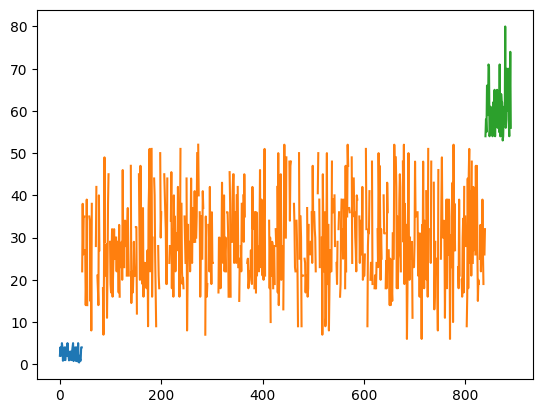

In [26]:
threshold = 0.8
figure = plot_interquartile_range(subset, threshold)
figure.show()

Подход Z-Score

In [27]:
def get_z_score_mask(data: pd.Series, threshold: float) -> pd.Series:
    """
    Данная функция должна считать Z-Score и возвращать маску выбросов
    """

    mean = data.mean()
    std = data.std()

    outliers_mask = (data - mean)/std > threshold
    return outliers_mask

In [28]:
threshold = 3
outlier_mask = get_z_score_mask(subset, threshold)

In [29]:
outlier_mask

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [30]:
sum(outlier_mask)

2

In [31]:
def plot_z_score(data: pd.Series, threshold: float) -> plt.Figure:
    """
    Визуализация Z-Score
    """

    mean = data.mean()
    std = data.std()

    data = (data - mean)/std

    x_values = np.arange(len(data))

    figure = plt.gcf()
    axe = figure.gca()
    axe.plot(x_values, data)
    axe.plot(x_values, np.full(x_values.shape, threshold), 'k-')
    return figure

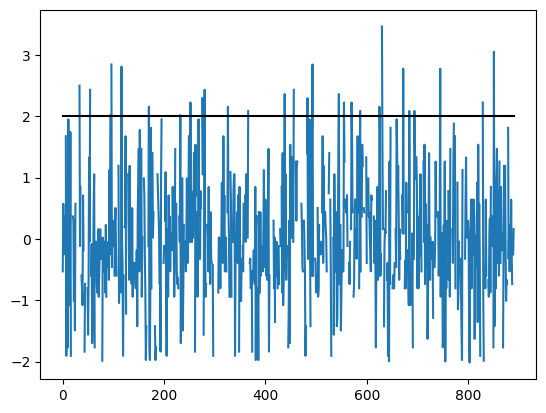

In [32]:
threshold = 2
figure = plot_z_score(subset, threshold)
figure.show()